In [1]:
# !pip install mlflow

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import mlflow

In [3]:
wine_path = "wine-quality.csv"
data = pd.read_csv(wine_path)


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
train, test = train_test_split(data)
test_x = test.drop(["quality"], axis=1)
test_y = test['quality']
train_x = train.drop(["quality"], axis=1)
train_y = train['quality']

<Axes: xlabel='quality', ylabel='Count'>

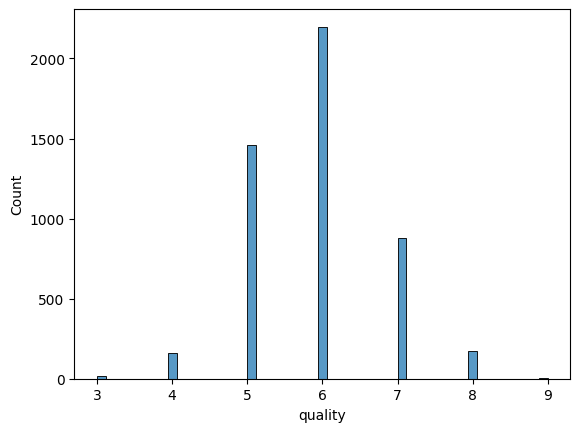

In [6]:
sns.histplot(data['quality'])

### Create/Set Experiment and Start Run

In [7]:
mlflow.set_experiment("mlops")

2023/07/07 14:23:45 INFO mlflow.tracking.fluent: Experiment with name 'mlops' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/veerpati/mlflow/mlruns/312426911506771110', creation_time=1688711025520, experiment_id='312426911506771110', last_update_time=1688711025520, lifecycle_stage='active', name='mlops', tags={}>

In [17]:
alpha = 1
l1_ratio = 0.6

### Log hyperparamters

In [18]:
mlflow.end_run()
mlflow.start_run(run_name='newEN')
mlflow.log_param('alpha',alpha)
mlflow.log_param('l1_ratio',l1_ratio)

0.6

In [19]:
lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
lr.fit(train_x, train_y)

ElasticNet(alpha=1, l1_ratio=0.6, random_state=42)

In [20]:
predicted_qualities = lr.predict(test_x)

In [21]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [22]:
(rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

In [23]:
(rmse, mae, r2)

(0.846682812758406, 0.6409616135057017, 0.06699740590959224)

### Log Metrics

In [24]:
mlflow.log_metric('rmse',rmse)
mlflow.log_metric('mae',mae)
mlflow.log_metric('r2',r2)

### 

### Log Model

In [25]:
mlflow.sklearn.log_model(lr,'model')

### change alpha and l1_ration and re run 

In [26]:
print(lr.predict(test_x[:3]))
print(test_y[:3])

[5.87959538 5.54395889 5.8771015 ]
323     6
2982    6
672     8
Name: quality, dtype: int64


C:\Users\veerpati\AppData\Local\Temp\ipykernel_14760\2162945952.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(test_y[:3])


### Train with Linear Regression Model

In [27]:
lrm = LinearRegression()
lrm.fit(train_x,train_y)

LinearRegression()

In [28]:
predicted_qualities_lrm = lrm.predict(test_x)

In [29]:
(rmse, mae, r2) = eval_metrics(test_y, predicted_qualities_lrm)

In [30]:
(rmse, mae, r2)

(0.7486399963716823, 0.583873204062365, 0.27056362778993537)

In [31]:
lrm.predict(test_x[:3])

array([5.89555127, 5.99736144, 6.94331695])

In [34]:
lr.predict(test_x[:3])

array([5.87959538, 5.54395889, 5.8771015 ])

In [35]:
test_y[:3]

C:\Users\veerpati\AppData\Local\Temp\ipykernel_14760\112819720.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_y[:3]


323     6
2982    6
672     8
Name: quality, dtype: int64

In [36]:
mlflow.end_run()
mlflow.start_run(run_name='linearRegressionRun')
mlflow.log_metric('rmse',rmse)
mlflow.log_metric('mae', mae)
mlflow.log_metric('r2', r2)

In [37]:
mlflow.sklearn.log_model(lr,"lrmodel")